In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#    2 polygon manning 0.02 - 0.09 at -20ft

# Sheltown
    -I am using 2 polygon manning 0.02 - 0.09 at -20ft

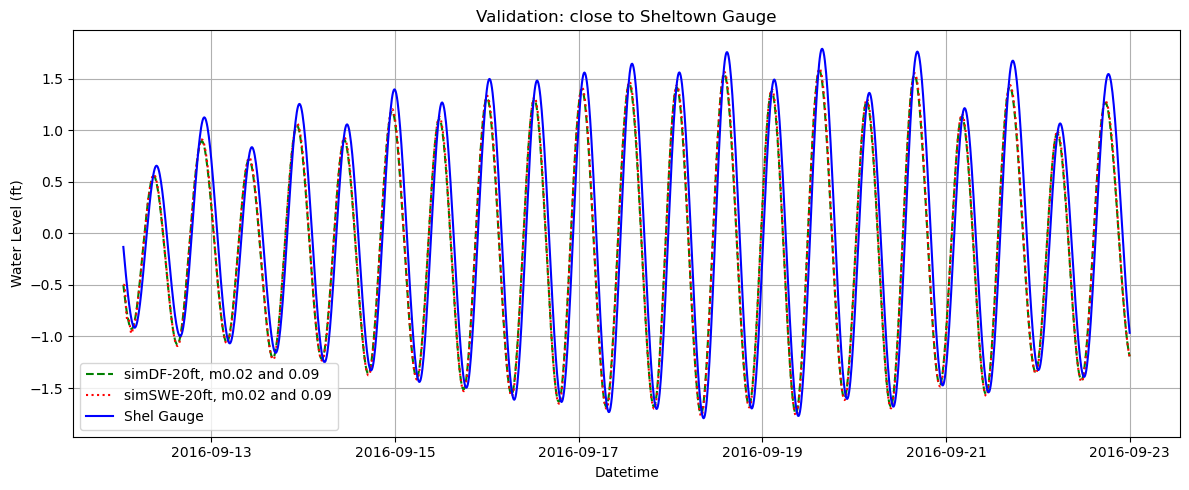

In [12]:
# Compare to Shelltown

# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\Coastal validation.xlsx"  # geometry 5.1.1

# === Load Data ===
df_cross1 = pd.read_excel(excel_path, sheet_name='Cross1')
df_shel = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean column names ===
df_cross1.columns = df_cross1.columns.str.strip()
df_shel.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross1['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_shel['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-12"
end_date = "2016-09-23"

# === Filter both DataFrames to the same date range ===
df_cross1_filtered = df_cross1[(df_cross1['Datetime'] >= start_date) & (df_cross1['Datetime'] <= end_date)]
df_shel_filtered = df_shel[(df_shel['Datetime'] >= start_date) & (df_shel['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross1_filtered[['Datetime', 'simDF', 'simSWE']],
    df_shel_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['simDF'], label='simDF-20ft, m0.02 and 0.09', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['simSWE'], label='simSWE-20ft, m0.02 and 0.09', linestyle=':', color='red')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Shel Gauge', linestyle='-', color='blue')

# # === Add metrics text inside plot ===
# plt.text(0.01, 0.95,
#          f'Bias = {bias:.3f} ft\nRMSE = {rmse:.3f} ft\nMAE = {mae:.3f} ft\nR² = {r2:.3f}',
#          transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#          bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

plt.title("Validation: close to Sheltown Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


DF

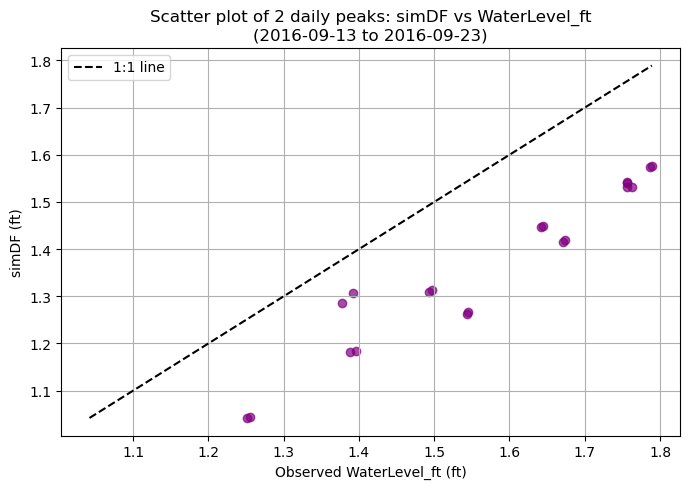

In [13]:
# Find the two largest values per day for simDF and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'simDF_peak1': sim_peaks[0], 'simDF_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for simDF and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'simDF', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(7, 5))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['simDF_peak1'], peaks_simple_filtered['simDF_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('simDF (ft)')
plt.title('Scatter plot of 2 daily peaks: simDF vs WaterLevel_ft\n(2016-09-13 to 2016-09-23)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SWE

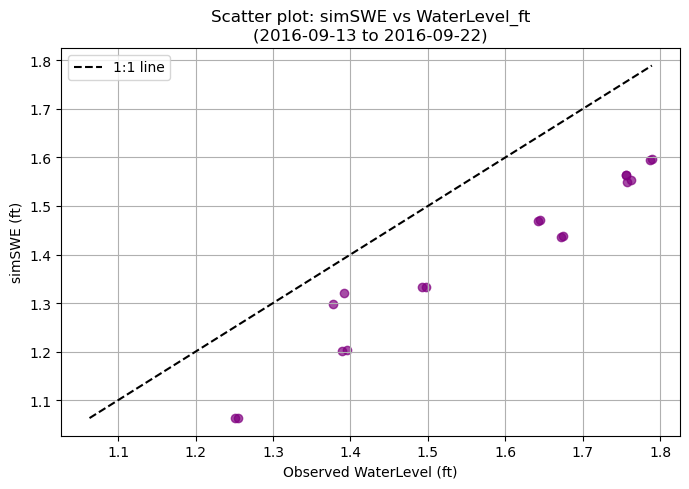

In [14]:
# Find the two largest values per day for simSWE and WaterLevel_ft, but do not merge on Datetime
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'simSWE_peak1': sim_peaks[0], 'simSWE_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for simSWE and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'simSWE', 'WaterLevel_ft')

# Filter for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-21").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(7, 5))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['simSWE_peak1'], peaks_simple_filtered['simSWE_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel (ft)')
plt.ylabel('simSWE (ft)')
plt.title('Scatter plot: simSWE vs WaterLevel_ft\n(2016-09-13 to 2016-09-22)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Calculate RMSE for simSWE and WaterLevel_ft
sim = df_merged['simSWE']
obs = df_merged['WaterLevel_ft']
rmse_simSWE = np.sqrt(((sim - obs) ** 2).mean())
print(f"RMSE for simSWE vs WaterLevel_ft: {rmse_simSWE:.3f} ft")

RMSE for simSWE vs WaterLevel_ft: 0.349 ft


In [16]:
# Calculate Nash-Sutcliffe Efficiency (NSE) for SWE and WaterLevel_ft for entire time series

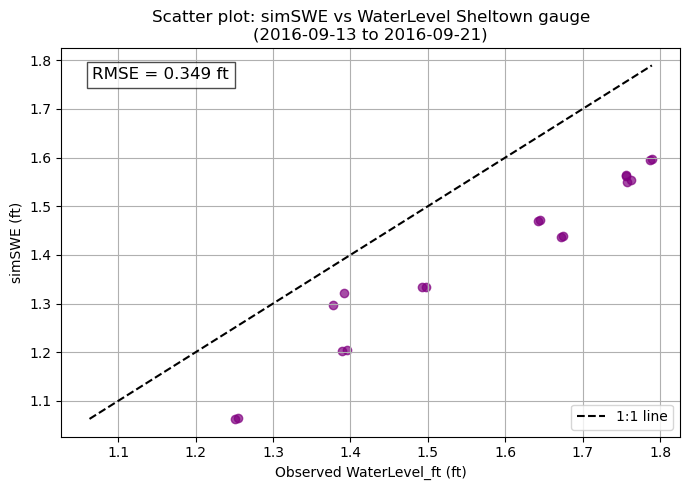

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('simSWE (ft)')
plt.title('Scatter plot: simSWE vs WaterLevel Sheltown gauge\n(2016-09-13 to 2016-09-21)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Print RMSE inside the plot
plt.text(0.05, 0.95, f'RMSE = {rmse_simSWE:.3f} ft', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.show()

C:\Users\dveronez\AppData\Local\Temp\ipykernel_67088\3802270219.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],


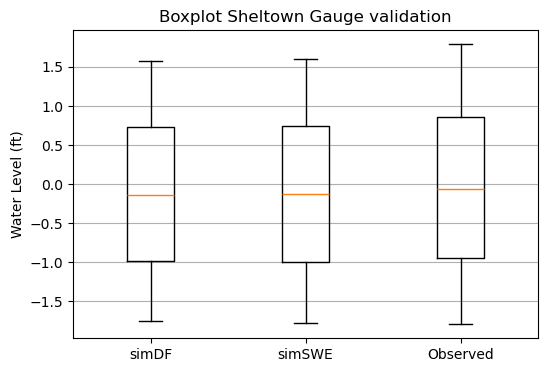

In [18]:
plt.figure(figsize=(6, 4))
plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],
            labels=['simDF', 'simSWE', 'Observed'])
plt.ylabel('Water Level (ft)')
plt.title('Boxplot Sheltown Gauge validation')
plt.grid(True, axis='y')
plt.show()

In [19]:
# Step 1: Extract the relevant columns from df_merged
simDF1 = df_merged['simDF']
obs = df_merged['WaterLevel_ft']

# Step 2: Calculate the squared differences
squared_diff = (simDF1 - obs) ** 2

# Step 3: Compute the mean of the squared differences
mse = squared_diff.mean()

# Step 4: Take the square root to get RMSE
rmse = np.sqrt(mse)

print(f"RMSE for simDF vs WaterLevel_ft: {rmse:.3f} ft")


# Calculate Nash-Sutcliffe Efficiency (NSE)
nse1 = 1 - ((simDF1 - obs).pow(2).sum() / (obs - obs.mean()).pow(2).sum())
print(f"NSE for simDF vs WaterLevel_ft: {nse1:.3f}")

RMSE for simDF vs WaterLevel_ft: 0.367 ft
NSE for simDF vs WaterLevel_ft: 0.868


In [20]:
# Step 1: Extract the relevant columns from df_merged
simSWE1 = df_merged['simSWE']
obs = df_merged['WaterLevel_ft']

# Step 2: Calculate the squared differences
squared_diff = (simSWE1 - obs) ** 2

# Step 3: Compute the mean of the squared differences
mse = squared_diff.mean()

# Step 4: Take the square root to get RMSE
rmse = np.sqrt(mse)

print(f"RMSE for simDF vs WaterLevel_ft: {rmse:.3f} ft")

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse2 = 1 - ((simSWE1 - obs).pow(2).sum() / (obs - obs.mean()).pow(2).sum())
print(f"NSE for simSWE vs WaterLevel_ft: {nse2:.3f}")

RMSE for simDF vs WaterLevel_ft: 0.349 ft
NSE for simSWE vs WaterLevel_ft: 0.881


# Snow
      -I am using 2 polygon manning 0.02 - 0.09 at -20ft

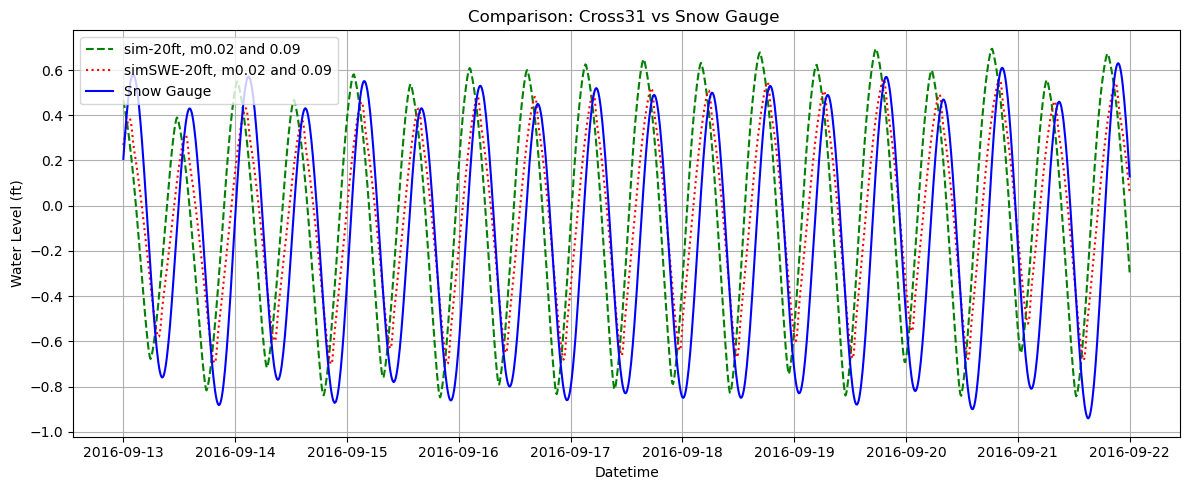

In [21]:
# Compare to Snow hill + bias


# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\Coastal validation.xlsx"  # geometry 5.1.1

# === Load Data ===
df_cross31 = pd.read_excel(excel_path, sheet_name='Cross 31')
df_snow = pd.read_excel(excel_path, sheet_name='Snow')

# === Clean column names ===
df_cross31.columns = df_cross31.columns.str.strip()
df_snow.columns = df_snow.columns.str.strip()

# === Convert datetime ===
df_cross31['Datetime'] = pd.to_datetime(df_cross31['Datetime'])
df_snow['Datetime'] = pd.to_datetime(df_snow['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-13"
end_date = "2016-09-22"

# === Filter both DataFrames to the same date range ===
df_cross31_filtered = df_cross31[(df_cross31['Datetime'] >= start_date) & (df_cross31['Datetime'] <= end_date)]
df_snow_filtered = df_snow[(df_snow['Datetime'] >= start_date) & (df_snow['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross31_filtered[['Datetime', 'simDF', 'simSWE']],
    df_snow_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['simDF'], label='sim-20ft, m0.02 and 0.09', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['simSWE'], label='simSWE-20ft, m0.02 and 0.09', linestyle=':', color='red')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Snow Gauge', linestyle='-', color='blue')


plt.title("Comparison: Cross31 vs Snow Gauge ")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

DF

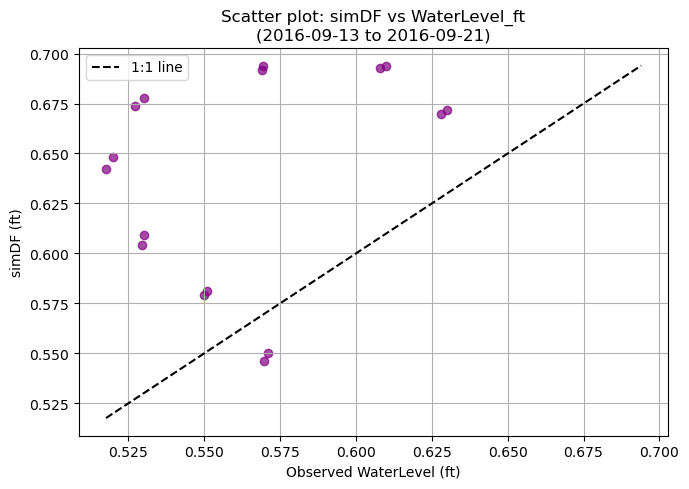

In [22]:
# Find the two largest values per day for simDF and WaterLevel_ft, but do not merge on Datetime
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'simDF_peak1': sim_peaks[0], 'simDF_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for simDF and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'simDF', 'WaterLevel_ft')

# Filter for the desired date range
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-21").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(7, 5))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['simDF_peak1'], peaks_simple_filtered['simDF_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel (ft)')
plt.ylabel('simDF (ft)')
plt.title('Scatter plot: simDF vs WaterLevel_ft\n(2016-09-13 to 2016-09-21)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SWE

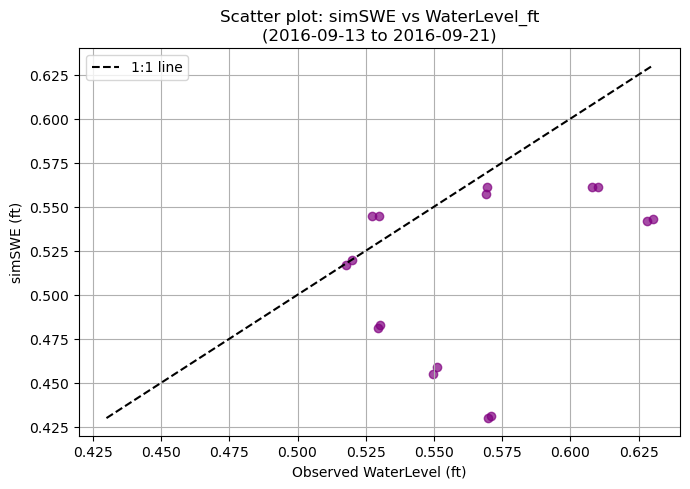

In [23]:
# Find the two largest values per day for simSWE and WaterLevel_ft, but do not merge on Datetime
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'simSWE_peak1': sim_peaks[0], 'simSWE_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for simSWE and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'simSWE', 'WaterLevel_ft')

# Filter for the desired date range
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-21").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(7, 5))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['simSWE_peak1'], peaks_simple_filtered['simSWE_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel (ft)')
plt.ylabel('simSWE (ft)')
plt.title('Scatter plot: simSWE vs WaterLevel_ft\n(2016-09-13 to 2016-09-21)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Calculate RMSE for simSWE and WaterLevel_ft
sim = df_merged['simSWE']
obs = df_merged['WaterLevel_ft']
rmse_simSWE = np.sqrt(((sim - obs) ** 2).mean())
print(f"RMSE for simSWE vs WaterLevel_ft: {rmse_simSWE:.3f} ft")

RMSE for simSWE vs WaterLevel_ft: 0.259 ft


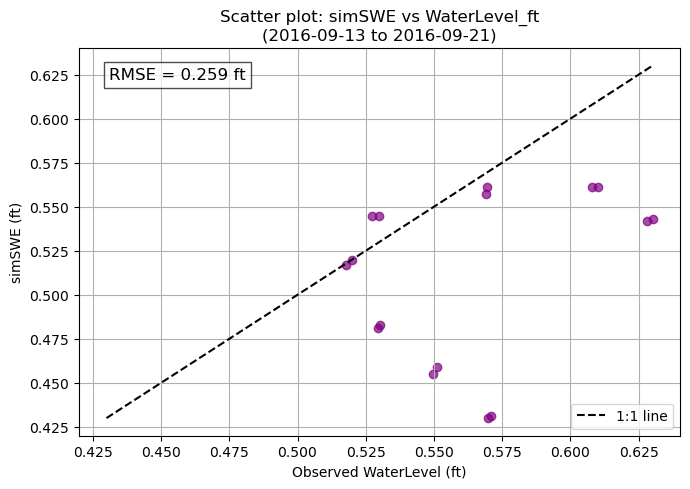

In [25]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel (ft)')
plt.ylabel('simSWE (ft)')
plt.title('Scatter plot: simSWE vs WaterLevel_ft\n(2016-09-13 to 2016-09-21)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Print RMSE inside the plot
plt.text(0.05, 0.95, f'RMSE = {rmse_simSWE:.3f} ft', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],
            labels=['simDF', 'simSWE', 'Observed'])
plt.ylabel('Water Level (ft)')
plt.title('Boxplot - Snow Gauge validation')
plt.grid(True, axis='y')
plt.show()

C:\Users\dveronez\AppData\Local\Temp\ipykernel_67088\4196993256.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],


KeyboardInterrupt: 

# 2 polygon manning 0.035

## Sheltown

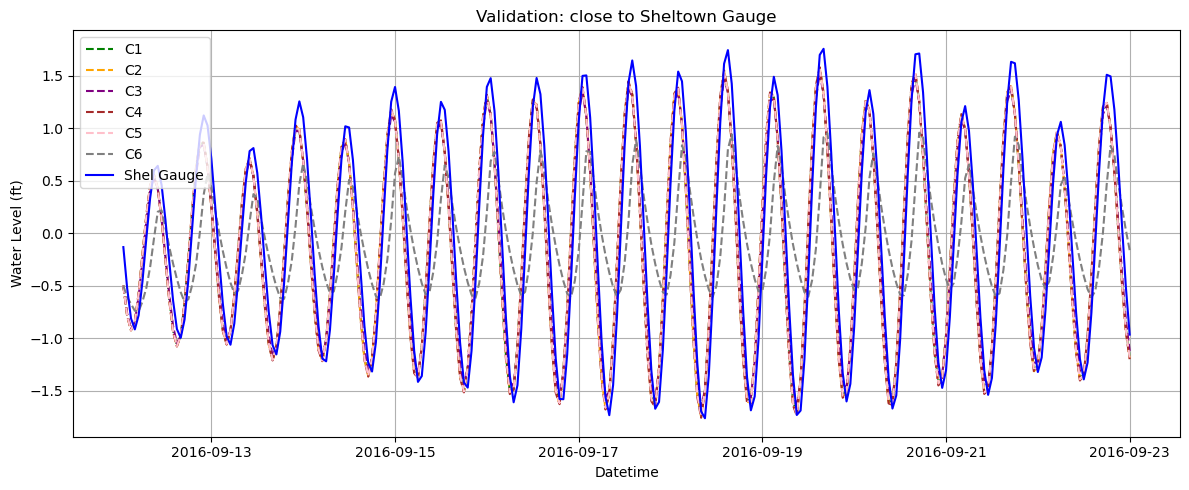

In [105]:
# Compare to Shelltown

# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx" #projectA_geometry Coastal copy

# === Load Data ===
df_cross1 = pd.read_excel(excel_path, sheet_name='Cross1')
df_shel = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean column names ===
df_cross1.columns = df_cross1.columns.str.strip()
df_shel.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross1['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_shel['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-12"
end_date = "2016-09-23"

# === Filter both DataFrames to the same date range ===
df_cross1_filtered = df_cross1[(df_cross1['Datetime'] >= start_date) & (df_cross1['Datetime'] <= end_date)]
df_shel_filtered = df_shel[(df_shel['Datetime'] >= start_date) & (df_shel['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross1_filtered[['Datetime', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']],
    df_shel_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['C1'], label='C1', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['C2'], label='C2', linestyle='--', color='orange')
plt.plot(df_merged['Datetime'], df_merged['C3'], label='C3', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['C4'], label='C4', linestyle='--', color='brown')
plt.plot(df_merged['Datetime'], df_merged['C5'], label='C5', linestyle='--', color='pink')
plt.plot(df_merged['Datetime'], df_merged['C6'], label='C6', linestyle='--', color='grey')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Shel Gauge', linestyle='-', color='blue')


plt.title("Validation: close to Sheltown Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### RMSE

In [18]:
# Step-by-step RMSE calculation for C1 and WaterLevel_ft using df_merged

# 1. Extract the relevant columns
c1 = df_merged['C1']
obs = df_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = c1 - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c1 = np.sqrt(mse)

# print("Step 1: Difference\n", diff.head())
# print("Step 2: Squared Difference\n", squared_diff.head())
# print("Step 3: Mean Squared Error (MSE):", mse)
print("Step 4: RMSE:", rmse_c1)

Step 4: RMSE: 0.3559006296717414


In [19]:
# Step-by-step RMSE calculation for C2 and WaterLevel_ft using df_merged

# 1. Extract the relevant columns
c2 = df_merged['C2']
obs = df_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = c2 - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c2 = np.sqrt(mse)

# print("Step 1: Difference\n", diff.head())
# print("Step 2: Squared Difference\n", squared_diff.head())
# print("Step 3: Mean Squared Error (MSE):", mse)
print("Step 4: RMSE:", rmse_c2)

Step 4: RMSE: 0.365546724170244


In [20]:
# Step-by-step RMSE calculation for C3 and WaterLevel_ft using df_merged

# 1. Extract the relevant columns
c3 = df_merged['C3']
obs = df_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = c3 - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c3 = np.sqrt(mse)

# print("Step 1: Difference\n", diff.head())
# print("Step 2: Squared Difference\n", squared_diff.head())
# print("Step 3: Mean Squared Error (MSE):", mse)
print("Step 4: RMSE:", rmse_c3)

Step 4: RMSE: 0.3021424208440243


In [21]:
# Step-by-step RMSE calculation for C4 and WaterLevel_ft using df_merged

# 1. Extract the relevant columns
c4 = df_merged['C4']
obs = df_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = c4 - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c4 = np.sqrt(mse)

# print("Step 1: Difference\n", diff.head())
# print("Step 2: Squared Difference\n", squared_diff.head())
# print("Step 3: Mean Squared Error (MSE):", mse)
print("Step 4: RMSE:", rmse_c4)

Step 4: RMSE: 0.3730816114150659


In [22]:
# Step-by-step RMSE calculation for C5 and WaterLevel_ft using df_merged

# 1. Extract the relevant columns
c5 = df_merged['C5']
obs = df_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = c5 - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c5 = np.sqrt(mse)

# print("Step 1: Difference\n", diff.head())
# print("Step 2: Squared Difference\n", squared_diff.head())
# print("Step 3: Mean Squared Error (MSE):", mse)
print("Step 4: RMSE:", rmse_c5)

Step 4: RMSE: 0.3616653508839077


In [23]:
# Step-by-step RMSE calculation for C6 and WaterLevel_ft using df_merged

# 1. Extract the relevant columns
c6 = df_merged['C6']
obs = df_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = c6 - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c6 = np.sqrt(mse)

# print("Step 1: Difference\n", diff.head())
# print("Step 2: Squared Difference\n", squared_diff.head())
# print("Step 3: Mean Squared Error (MSE):", mse)
print("Step 4: RMSE:", rmse_c6)

Step 4: RMSE: 0.762515187583774


In [17]:
# Create a DataFrame with RMSE values for each column
rmse_table = pd.DataFrame({
    'RMSE': [rmse_c1, rmse_c2, rmse_c3, rmse_c4, rmse_c5, rmse_c6]
}, index=['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

# Display as a table
rmse_table.style.format("{:.3f}")

,RMSE
C1,0.356
C2,0.366
C3,0.302
C4,0.373
C5,0.362
C6,0.763


In [106]:
# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_shel = pd.read_excel(excel_path, sheet_name='Cross1')  # simulated
df_obs_shel = pd.read_excel(excel_path, sheet_name='Shel')    # observed

# === Clean and convert datetime ===
df_sim_shel.columns = df_sim_shel.columns.str.strip()
df_obs_shel.columns = df_obs_shel.columns.str.strip()
df_sim_shel['Datetime'] = pd.to_datetime(df_sim_shel['Datetime'])
df_obs_shel['Datetime'] = pd.to_datetime(df_obs_shel['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_shel = df_sim_shel[(df_sim_shel['Datetime'] >= start_date) & (df_sim_shel['Datetime'] <= end_date)]
df_obs_shel = df_obs_shel[(df_obs_shel['Datetime'] >= start_date) & (df_obs_shel['Datetime'] <= end_date)]

# === Merge simulated and observed on datetime ===
df_merged_shel = pd.merge(df_sim_shel, df_obs_shel[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === List of simulated columns for Shelltown
simulated_cols_shel = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# === Compute RMSE and NSE
results_shel = []
for col in simulated_cols_shel:
    sim = df_merged_shel[col]
    obs = df_merged_shel['WaterLevel_ft']
    
    # RMSE
    rmse = np.sqrt(((sim - obs) ** 2).mean())
    
    # NSE
    numerator = ((sim - obs) ** 2).sum()
    denominator = ((obs - obs.mean()) ** 2).sum()
    nse = 1 - (numerator / denominator)
    
    results_shel.append({'Cell': col, 'RMSE (ft)': round(rmse, 3), 'NSE': round(nse, 3)})

# === Convert to DataFrame and display
df_results_shel = pd.DataFrame(results_shel)
print(df_results_shel)


  Cell  RMSE (ft)    NSE
0   C1      0.356  0.876
1   C2      0.366  0.869
2   C3      0.302  0.911
3   C4      0.373  0.864
4   C5      0.362  0.872
5   C6      0.763  0.431


In [ ]:
rmse_results = {}
for col in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']:
    rmse = np.sqrt(((df_merged[col] - df_merged['WaterLevel_ft']) ** 2).mean())
    rmse_results[col] = rmse

# Print nicely
for key, value in rmse_results.items():
    print(f"RMSE for {key}: {value:.3f}")


RMSE for C1: 0.356
RMSE for C2: 0.366
RMSE for C3: 0.302
RMSE for C4: 0.373
RMSE for C5: 0.362
RMSE for C6: 0.763


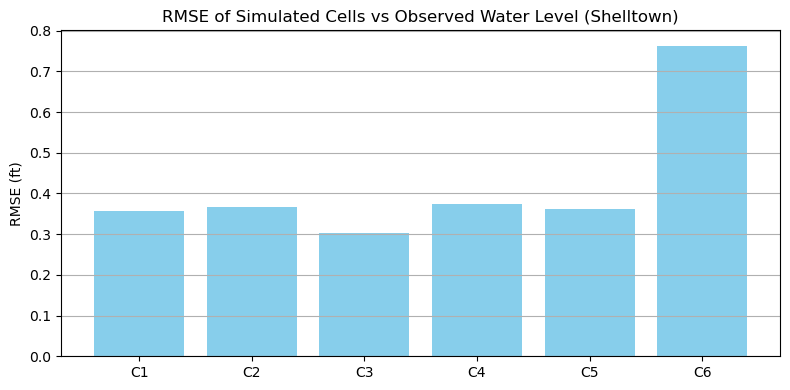

In [32]:
plt.figure(figsize=(8, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='skyblue')
plt.ylabel("RMSE (ft)")
plt.title("RMSE of Simulated Cells vs Observed Water Level (Shelltown)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Scatter plot
    Define the peak-finding function
    Use the function to get daily peaks
    Filter peaks by date range

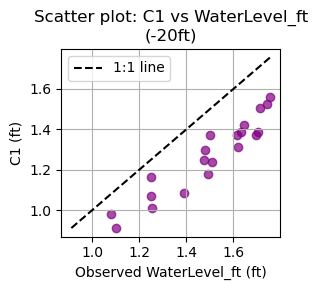

In [25]:
# Find the two largest values per day for C1 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C1_peak1': sim_peaks[0], 'C1_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C1 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C1', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C1_peak1'], peaks_simple_filtered['C1_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('C1 (ft)')
plt.title('Scatter plot: C1 vs WaterLevel_ft\n(-20ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

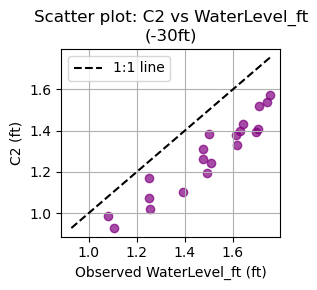

In [49]:
# Find the two largest values per day for C2 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C2_peak1': sim_peaks[0], 'C2_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C2 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C2', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C2_peak1'], peaks_simple_filtered['C2_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('C2 (ft)')
plt.title('Scatter plot: C2 vs WaterLevel_ft\n(-30ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

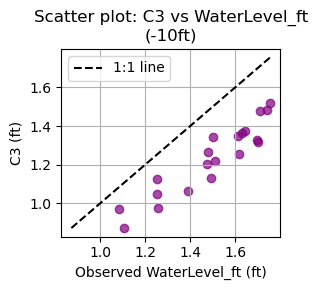

In [50]:
# Find the two largest values per day for C3 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C3_peak1': sim_peaks[0], 'C3_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C3 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C3', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C3_peak1'], peaks_simple_filtered['C3_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('C3 (ft)')
plt.title('Scatter plot: C3 vs WaterLevel_ft\n(-10ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

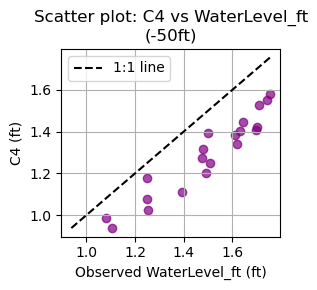

In [52]:
# Find the two largest values per day for C4 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C4_peak1': sim_peaks[0], 'C4_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C4 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C4', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C4_peak1'], peaks_simple_filtered['C4_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('C4 (ft)')
plt.title('Scatter plot: C4 vs WaterLevel_ft\n(-50ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

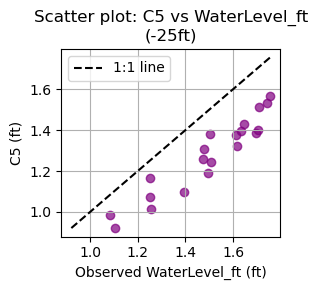

In [55]:
# Find the two largest values per day for C5 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C5_peak1': sim_peaks[0], 'C5_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C5 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C5', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C5_peak1'], peaks_simple_filtered['C5_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('C5 (ft)')
plt.title('Scatter plot: C5 vs WaterLevel_ft\n(-25ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

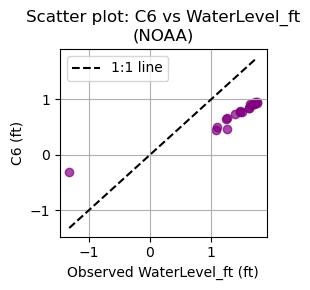

In [61]:
# Find the two largest values per day for C6 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C6_peak1': sim_peaks[0], 'C6_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C6 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C6', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C6_peak1'], peaks_simple_filtered['C6_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('C6 (ft)')
plt.title('Scatter plot: C6 vs WaterLevel_ft\n(NOAA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Snow

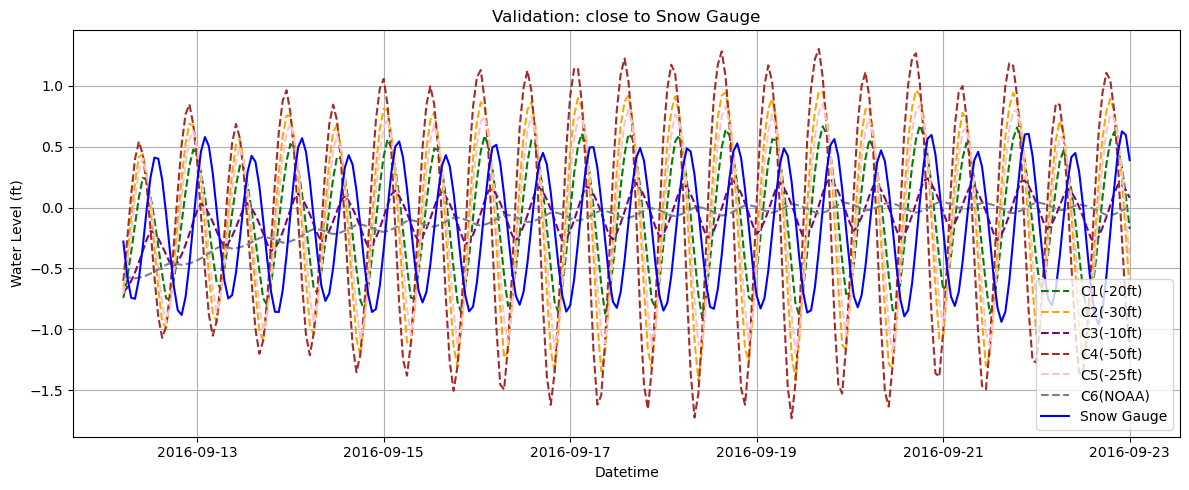

In [81]:
# Compare to Snow

# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx" #projectA_geometry Coastal copy

# === Load Data ===
df_cross31 = pd.read_excel(excel_path, sheet_name='Cross 31')
df_s = pd.read_excel(excel_path, sheet_name='Snow')

# === Clean column names ===
df_cross31.columns = df_cross31.columns.str.strip()
df_s.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross31['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_s['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-12"
end_date = "2016-09-23"

# === Filter both DataFrames to the same date range ===
df_cross31_filtered = df_cross31[(df_cross31['Datetime'] >= start_date) & (df_cross31['Datetime'] <= end_date)]
df_s_filtered = df_s[(df_s['Datetime'] >= start_date) & (df_s['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross31_filtered[['Datetime', '(s)C1', '(s)C2', '(s)C3', '(s)C4', '(s)C5', '(s)C6']],
    df_s_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)


# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['(s)C1'], label='C1(-20ft)', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['(s)C2'], label='C2(-30ft)', linestyle='--', color='orange')
plt.plot(df_merged['Datetime'], df_merged['(s)C3'], label='C3(-10ft)', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['(s)C4'], label='C4(-50ft)', linestyle='--', color='brown')
plt.plot(df_merged['Datetime'], df_merged['(s)C5'], label='C5(-25ft)', linestyle='--', color='pink')
plt.plot(df_merged['Datetime'], df_merged['(s)C6'], label='C6(NOAA)', linestyle='--', color='grey')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Snow Gauge', linestyle='-', color='blue')

plt.title("Validation: close to Snow Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### RMSE

In [ ]:
#Snow gauge RMSE calculation C1
import pandas as pd
import numpy as np

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C1 ===
sim = df_snow_merged['(s)C1']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c1 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C1:", round(rmse_c1, 3), "ft")



✅ Step 4: RMSE for Snow Hill (s)C1: 0.565 ft


In [97]:
#Snow gauge RMSE calculation C2

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C2 ===
sim = df_snow_merged['(s)C2']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c2 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C2:", round(rmse_c2, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C2: 0.916 ft


In [98]:
#Snow gauge RMSE calculation C3

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C3 ===
sim = df_snow_merged['(s)C3']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c3 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C3:", round(rmse_c3, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C3: 0.375 ft


In [100]:
#Snow gauge RMSE calculation C4

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C4 ===
sim = df_snow_merged['(s)C4']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c4 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C4:", round(rmse_c4, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C4: 1.211 ft


In [102]:
#Snow gauge RMSE calculation C5

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C5 ===
sim = df_snow_merged['(s)C5']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c5 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C5:", round(rmse_c5, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C5: 0.762 ft


In [103]:
#Snow gauge RMSE calculation C6

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C6 ===
sim = df_snow_merged['(s)C6']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c6 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C6:", round(rmse_c6, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C6: 0.495 ft


### Nash-Sutcliffe Efficiency (NSE) 

In [104]:


# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge simulated and observed on datetime ===
df_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === List of simulated columns
simulated_cols = ['(s)C1', '(s)C2', '(s)C3', '(s)C4', '(s)C5', '(s)C6']

# === Compute RMSE and NSE for each
results = []
for col in simulated_cols:
    sim = df_merged[col]
    obs = df_merged['WaterLevel_ft']
    
    # RMSE
    rmse = np.sqrt(((sim - obs) ** 2).mean())
    
    # NSE
    numerator = ((sim - obs) ** 2).sum()
    denominator = ((obs - obs.mean()) ** 2).sum()
    nse = 1 - (numerator / denominator)
    
    results.append({'Cell': col, 'RMSE (ft)': round(rmse, 3), 'NSE': round(nse, 3)})

# === Convert to DataFrame and display
df_results = pd.DataFrame(results)
print(df_results)


    Cell  RMSE (ft)    NSE
0  (s)C1      0.565 -0.403
1  (s)C2      0.916 -2.685
2  (s)C3      0.375  0.382
3  (s)C4      1.211 -5.437
4  (s)C5      0.762 -1.550
5  (s)C6      0.495 -0.076


### Scatter plot

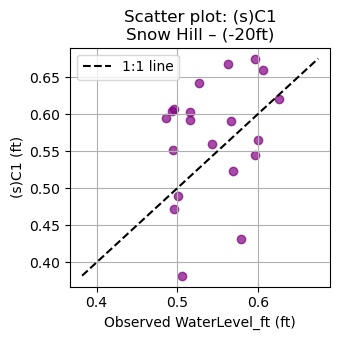

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C1_peak1': sim_peaks[0], 'C1_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C1_peak1'], peaks_snow_filtered['C1_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C1 (ft)')
plt.title('Scatter plot: (s)C1\nSnow Hill – (-20ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


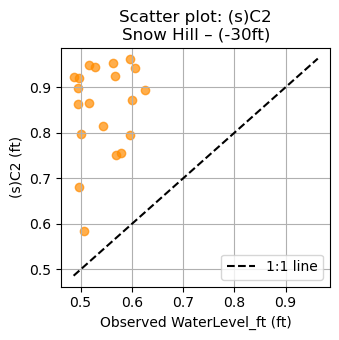

In [112]:
#C2
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C2']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C2_peak1': sim_peaks[0], 'C2_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C2', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C2_peak1'], peaks_snow_filtered['C2_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C2 (ft)')
plt.title('Scatter plot: (s)C2\nSnow Hill – (-30ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


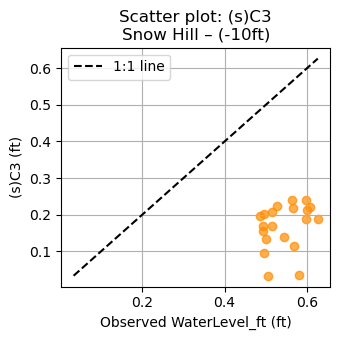

In [114]:
# C3
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C3']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C3_peak1': sim_peaks[0], 'C3_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C3', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C3_peak1'], peaks_snow_filtered['C3_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C3 (ft)')
plt.title('Scatter plot: (s)C3\nSnow Hill – (-10ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


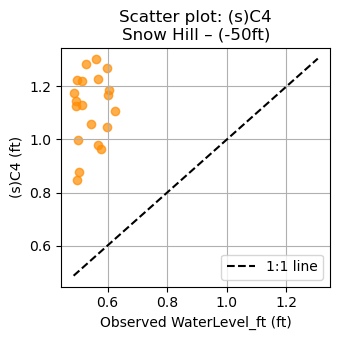

In [115]:
# 
# C4
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C4']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C4_peak1': sim_peaks[0], 'C4_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C4', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C4_peak1'], peaks_snow_filtered['C4_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C4 (ft)')
plt.title('Scatter plot: (s)C4\nSnow Hill – (-50ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


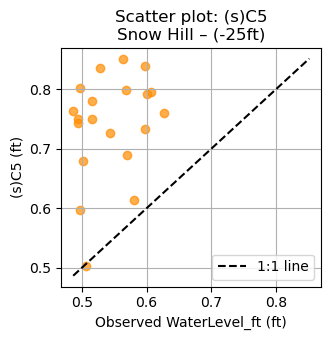

In [116]:
# 
# C5
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C5']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C5_peak1': sim_peaks[0], 'C5_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C5', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C5_peak1'], peaks_snow_filtered['C5_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C5 (ft)')
plt.title('Scatter plot: (s)C5\nSnow Hill – (-25ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


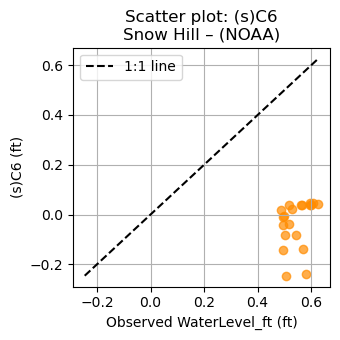

In [118]:
# C6
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C6']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C6_peak1': sim_peaks[0], 'C6_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C6', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C6_peak1'], peaks_snow_filtered['C6_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C6 (ft)')
plt.title('Scatter plot: (s)C6\nSnow Hill – (NOAA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Manning